In [1]:
import pandas as pd
import numpy as np

In [3]:
df_train=pd.read_csv('fashionmnist/fashion-mnist_train.csv')
df_test=pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [4]:
# concat the above dfs and adjust the indices accordingly. They should be from 0 to 69999
df=pd.concat([df_train,df_test],ignore_index=True)

In [5]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_concat =df
df_concat

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# take a mean of all the pixel values and return 1x
df_grouped = df_concat.mean()
df_grouped.drop('label', inplace=True)

In [8]:
df_grouped

pixel1       0.000829
pixel2       0.006743
pixel3       0.037729
pixel4       0.098371
pixel5       0.242343
              ...    
pixel780    17.894157
pixel781     8.496757
pixel782     2.723057
pixel783     0.823229
pixel784     0.069586
Length: 784, dtype: float64

In [9]:
# Sum of deviation from mean
df_concat['deviation'] = df_concat.drop('label', axis=1).apply(lambda x: np.sum(np.abs(x - df_grouped)**2), axis=1)

In [10]:
df_concat['deviation']

0        6.157783e+06
1        4.095566e+06
2        4.885622e+06
3        3.616239e+06
4        4.546011e+06
             ...     
69995    1.873594e+06
69996    2.217073e+06
69997    6.330659e+06
69998    6.585481e+06
69999    5.460764e+06
Name: deviation, Length: 70000, dtype: float64

In [11]:
sum=df_concat['deviation'].sum()

In [12]:
sum

310206895474.43243

In [13]:
# Defining m
m=5000

In [14]:
q=[0 for i in range(70000)]
for i in range(70000):
    q[i]= 0.5*(df_concat['deviation'][i]/sum + (1/70000))

In [15]:
q

[1.706814175062386e-05,
 1.374420239844173e-05,
 1.501763770613067e-05,
 1.297161105593779e-05,
 1.4470242206849875e-05,
 1.1798510147312595e-05,
 1.5356450074048075e-05,
 1.5484701482227065e-05,
 1.6744460531248805e-05,
 1.3770100455291816e-05,
 1.740620640139613e-05,
 1.4504339656455365e-05,
 1.1532103879689519e-05,
 1.675202699448889e-05,
 1.0115047328911451e-05,
 1.0170944102724004e-05,
 1.8284857710724916e-05,
 1.6536786261785926e-05,
 1.1888376082479858e-05,
 1.344056586336102e-05,
 1.1621361560670268e-05,
 1.3513480569140506e-05,
 9.741310530600573e-06,
 1.615967456272014e-05,
 1.1623693811396146e-05,
 1.3514165091549667e-05,
 1.5017987808553596e-05,
 1.5811708868476723e-05,
 1.458694550082056e-05,
 1.6316553498806146e-05,
 1.564004659282499e-05,
 1.3216684407563832e-05,
 1.4113589720443277e-05,
 1.0996242922799351e-05,
 1.679213907170054e-05,
 1.3798173655279737e-05,
 1.2165397881375904e-05,
 1.6553042798962056e-05,
 1.8453575996370874e-05,
 1.3828367202349911e-05,
 1.709684533

In [16]:
weight=[0 for i in range(70000)]
for i in range(70000):
    weight[i]=1/(m*q[i])

In [17]:
weight

[11.717737227761763,
 14.551590132481993,
 13.317673785561745,
 15.418285295291016,
 13.821468717733325,
 16.95129279060331,
 13.023843338506586,
 12.91597388748855,
 11.944248644305771,
 14.524222292302923,
 11.490154453411414,
 13.788976591635947,
 17.342889214884927,
 11.938853731897419,
 19.772522411076384,
 19.66385794475417,
 10.93801237964738,
 12.094248352363996,
 16.823155543905116,
 14.880325875653789,
 17.209687432568348,
 14.800036080765278,
 20.531118412839426,
 12.37648686696907,
 17.206234373097065,
 14.799286426141036,
 13.317363321209294,
 12.648854191765023,
 13.710889643671416,
 12.257490530376629,
 12.787685689616282,
 15.132388262637273,
 14.170739263470558,
 18.188030348558843,
 11.910334898134332,
 14.494671903442233,
 16.440070596143958,
 12.082370741682661,
 10.838007768214274,
 14.46302351343499,
 11.698064531281672,
 16.9211368357101,
 10.410501893922683,
 19.712728383673547,
 20.325029783048397,
 14.516111072554336,
 20.18933830232027,
 12.16136027174081,
 1

In [20]:
sampled_points = df_concat.drop('deviation',axis=1).sample(n=m, weights=q, replace=True)

In [21]:
sampled_points

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
25525,0,0,0,0,0,0,0,0,0,130,...,88,27,0,0,0,0,0,0,0,0
68735,1,0,0,0,0,0,0,0,0,0,...,118,4,0,0,0,0,0,0,0,0
54890,0,0,0,0,0,0,0,0,88,159,...,129,138,141,160,132,0,0,0,0,0
22973,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8719,2,0,0,0,0,0,0,2,2,0,...,0,0,0,29,135,164,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,3,0,0,0,0,0,0,0,0,0,...,102,0,0,0,0,0,0,0,0,0
52400,0,0,0,0,0,0,0,0,0,0,...,86,0,0,0,0,0,0,0,0,0
5659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39645,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
weight = [weight[i] for i in sampled_points.index]

In [39]:
df = df.drop('deviation',axis=1)

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(df.drop('label',axis=1))

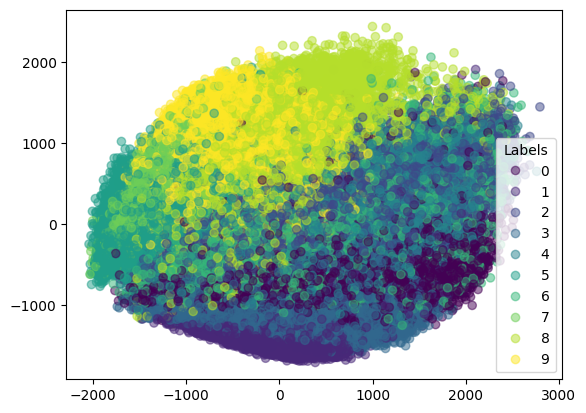

In [47]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(df['label'])
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

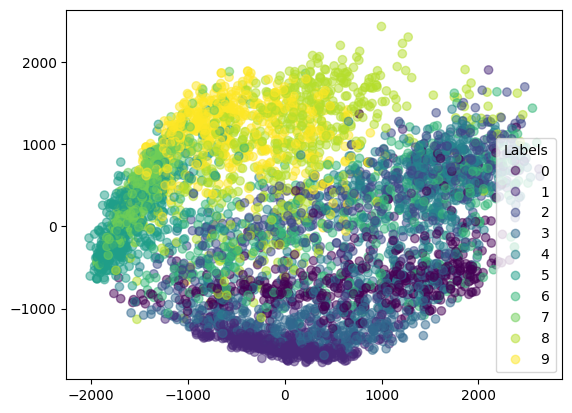

In [48]:
data_2d = pca.transform(sampled_points.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=sampled_points['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(sampled_points['label'])
labels = label_encoder.transform(sampled_points['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [52]:
# apply kmeans on this sampled points
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)


In [61]:
pred = kmeans.fit_predict(sampled_points.drop('label', axis=1),sample_weight=weight)

In [32]:
# give me an accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(sampled_points['label'], pred))

# also give an F1 score
from sklearn.metrics import f1_score
f1_score(sampled_points['label'], pred, average='weighted')


0.1246


0.11542772187163274

In [62]:
from sklearn.metrics import rand_score
rand_score(sampled_points['label'], pred)

0.8918801360272054

In [63]:
rand_score(df["label"],kmeans.predict(df.drop('label',axis=1)))

0.8840593347251899

In [64]:
rand_score(df["label"],kmeans.fit_predict(df.drop('label',axis=1)))

0.8718339576279661